<a href="https://colab.research.google.com/github/jarkuszewski/NeuralNetworks/blob/main/Adal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt

#deklaracja zmiennych
LEARNING_RATE = 0.0001
IMAGE_VECTOR_SIZE = 28 * 28
EPOCHS = 100000
error = []

#wczytanie danych
(x_train, y_train), (x_test, y_test) = mnist.load_data()


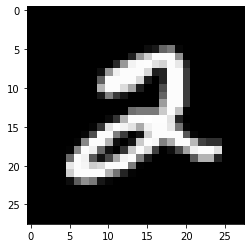

In [517]:
plt.imshow(x_train[5], cmap='gray')

In [2]:
# Spłaszczenie obrazów i normalizacja
x_train = x_train.reshape(x_train.shape[0], IMAGE_VECTOR_SIZE)
x_train = np.ceil(x_train / 255.0)
x_train_with_bias = np.zeros((x_train.shape[0], IMAGE_VECTOR_SIZE + 1))

for i, value in enumerate(x_train):
  x_train_with_bias[i] = np.concatenate((np.array([1]), x_train[i]))

x_train_with_bias.shape

(60000, 785)

In [3]:
x_test = x_test.reshape(x_test.shape[0], IMAGE_VECTOR_SIZE)
x_test = np.ceil(x_test / 255.0)
x_test_with_bias = np.zeros((x_test.shape[0], IMAGE_VECTOR_SIZE + 1))

for i, value in enumerate(x_test):
  x_test_with_bias[i] = np.concatenate((np.array([1]), x_test[i]))

x_test_with_bias.shape

(10000, 785)

In [37]:
def train(E, C, iteracja):
  weights = np.random.uniform(low=-0.01, high=0.01, size=IMAGE_VECTOR_SIZE + 1)
  for tmp in range(EPOCHS):
    # Get index of random input example (j)
    j = np.random.randint(len(E))
    # Get result (O)
    result = np.sum(weights * E[j])
    # Get error (ERR)
    ERR = C[j] - result
    if tmp < 1:
      error.append(len(y_test) - correct_nums())
    weights += LEARNING_RATE * ERR * E[j]
  return weights

In [41]:
perceptrons = []
for i in range(10):
  perceptrons.append(train(x_train_with_bias, [1 if val == i else -1 for val in y_train], i))

Total 0/10000 (0.0%)
Total 902/10000 (9.02%)
Total 1930/10000 (19.3%)
Total 2641/10000 (26.41%)
Total 3326/10000 (33.26%)
Total 4024/10000 (40.24%)
Total 4380/10000 (43.8%)
Total 5140/10000 (51.4%)
Total 5904/10000 (59.04%)
Total 6277/10000 (62.77%)


In [15]:
def prediction(input):
  predictions = []
  #10 perceptronów
  for perceptron in perceptrons:
    #waga * input
    predictions.append(np.sum(perceptron * input))

  result = []
  for i, value in enumerate(predictions):
    if value > 0:
      result.append(i)
  
  return result

In [40]:
def correct_nums():
  correct_numbers_counter = 0

  for i, value in enumerate(x_test_with_bias):
    predicted_number = prediction(value)
    correct_number = y_test[i]
  
    if correct_number in predicted_number and len(predicted_number) == 1:
      correct_numbers_counter += 1

  total_in_percents = round(float(correct_numbers_counter) / float(len(y_test)) * 100.0, 2)
  print('Total {good}/{total} ({percents}%)'.format(
      good=correct_numbers_counter,
      total=len(y_test),
      percents=total_in_percents,
  ))
  return correct_numbers_counter

Total 6852/10000 (68.52%)


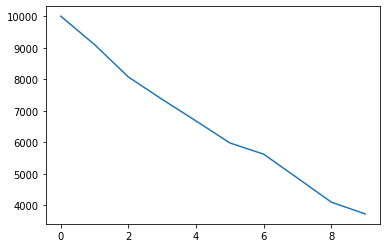

In [42]:
correct_nums()
plt.plot(error)